<a href="https://colab.research.google.com/github/yjyg1215/Project_Data-Analysis/blob/main/section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#주제: 다음 분기에 어떤 게임을 설계해야 할까?
1. 지역에 따라서 선호하는 게임 장르가 다를까?
  
  a) 가설 검정

  b) 그래프
2. 연도별 게임의 트렌드가 있을까?

  a) 연도와 플랫폼

  b) 연도와 장르
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
  
  a) Publisher

  b) Genre

  c) Platform
4. 닌텐도 플랫폼 게임과 플레이스테이션 플랫폼 게임은 각각 어떤 장르가 인기가 많을까?
5. 결론 및 출고량 예측

##파일 업로드, 전처리, feature engineering

In [5]:
from google.colab import files
files.upload();

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("vgames2.csv",index_col=0)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [8]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
df.duplicated().sum() #중복치 확인

1

- 중복치를 포함한 행이 1개 있는 것으로 확인되어 제거한다.

In [10]:
df=df.drop_duplicates() #중복치 제거
df.reset_index(drop=True,inplace=True) #인덱스 재정렬
df.shape

(16597, 9)

In [11]:
df.info() #결측치 및 데이터타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  object 
 6   EU_Sales     16597 non-null  object 
 7   JP_Sales     16597 non-null  object 
 8   Other_Sales  16597 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [12]:
df.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

- **Year, Genre, Publisher** 컬럼에 결측치가 있는 것으로 확인됨.

각 컬럼별 결측치 개수를 다 합쳐도 16597개에 비하면 전체의 10% 이하의 매우 작은 수라고 판단하여 **결측치 제거 처리**를 진행한다.

- Year 컬럼의 데이터타입이 float인데 int로 변경한다.

Year 값 중에 네자리수로 맞추어지지 않은 값들을 네자리로 조정한 후에 데이터타입 변경을 진행한다.

- Sales 컬럼들의 데이터타입이 object인데 float로 변경한다.

Sales 값 중에 'K', 'M' 이라는 문자가 섞여있는 값들을 수치로 조정한 후에 데이터타입 변경을 진행한다.


In [13]:
df=df.dropna() #결측치 제거
df.reset_index(drop=True,inplace=True) #인덱스 재정렬
df.shape

(16241, 9)

In [14]:
df['NA_Sales']=df['NA_Sales'].str.replace('K','000') #Sales 컬럼들을 float형태로 바꾸기 전에 문자들 먼저 처리하기
df['EU_Sales']=df['EU_Sales'].str.replace('K','000')
df['JP_Sales']=df['JP_Sales'].str.replace('K','000')
df['Other_Sales']=df['Other_Sales'].str.replace('K','000')

df['NA_Sales']=df['NA_Sales'].str.replace('M','')
df['EU_Sales']=df['EU_Sales'].str.replace('M','')
df['JP_Sales']=df['JP_Sales'].str.replace('M','')
df['Other_Sales']=df['Other_Sales'].str.replace('M','')

df=df.astype({'NA_Sales':'float','EU_Sales':'float','JP_Sales':'float','Other_Sales':'float'}) #Sales 컬럼들 float형태로 변환

df['NA_Sales']=df['NA_Sales'].apply(lambda x:(x/1000000) if x>=1000 else x) #Sales 컬럼들에서 문자 K를 가지고 있던 행들은 문자 처리때 '000'을 붙여주고 백만으로 나누는 처리를 진행함.
df['EU_Sales']=df['EU_Sales'].apply(lambda x:(x/1000000) if x>=1000 else x)
df['JP_Sales']=df['JP_Sales'].apply(lambda x:(x/1000000) if x>=1000 else x)
df['Other_Sales']=df['Other_Sales'].apply(lambda x:(x/1000000) if x>=1000 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [15]:
df['Year']=df['Year'].apply(lambda x:(x+2000) if x<=22 else x) #Year 값 네자리수로 맞추는 과정
df['Year']=df['Year'].apply(lambda x:(x+1900) if x<100 else x)

In [16]:
df=df.astype({'Year':'int'}) #Year 데이터타입 float에서 int형태로 변환

In [17]:
df #전처리 후 데이터프레임 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [18]:
df['Total_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'] #전세계 출고량 컬럼을 새롭게 추가
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


##Topic 1. 지역에 따라서 선호하는 게임 장르가 다를까?

###a) 가설 검정

지역과 선호하는 게임 장르가 서로 관련이 있는지(관련이 있다면 지역마다 선호 장르가 다름을 의미하겠죠) 검정하기 위해 카이제곱 독립성 검정을 진행한다.

H0: 선호하는 게임 장르는 지역별로 같다. (지역과 선호 장르가 무관함)

Ha: 선호하는 게임 장르는 지역별로 다르다. (지역과 선호 장르가 관련 있음)

In [19]:
sales_genre=df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']] #Sales 컬럼들과 Genre 컬럼만 추출한 데이터프레임 생성
sales_genre_sum=sales_genre.groupby('Genre').sum() #Genre 컬럼으로 그룹화 한 후 각 Sales 값을 합함.

sales_genre_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


In [29]:
sales_genre_sum.cov() #컬럼간 공분산 및 각 컬럼별 분산 확인

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,59967.442309,34468.595891,5884.669955,12554.009555
EU_Sales,34468.595891,20358.778627,3345.296940,7463.938296
JP_Sales,5884.669955,3345.296940,7090.750481,1167.657573
Other_Sales,12554.009555,7463.938296,1167.657573,2768.047481


In [20]:
sales_genre_sum.corr() #컬럼간 상관관계 확인

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.986484,0.285377,0.974401
EU_Sales,0.986484,1.000000,0.278428,0.994272
JP_Sales,0.285377,0.278428,1.000000,0.263562
Other_Sales,0.974401,0.994272,0.263562,1.000000


-> 모두 양의 상관관계를 가지는 것으로 보이며, 일본은 다른 지역들과는 조금 양상이 다를 것으로 예상됨.

In [ ]:
from scipy.stats import chi2_contingency

a,pv,b,c=chi2_contingency(sales_genre_sum,correction=False) #카이제곱 검정 진행
round(pv,2)

0.0

-> 가설 검정 결과, pvalue<0.05이므로 선호하는 게임 장르는 지역별로 다름을 알 수 있다.

###b) 그래프

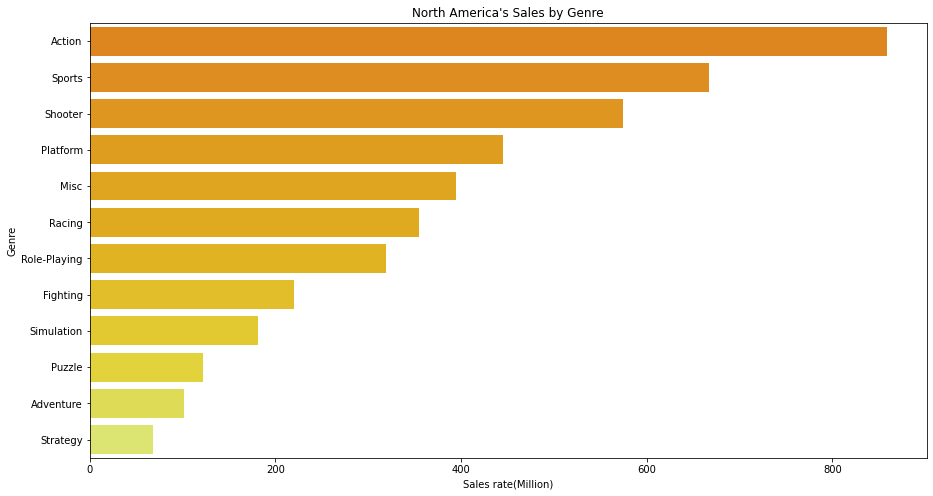

In [ ]:
sales_genre_sum=sales_genre_sum.reset_index()

#북아메리카 그래프
NA=sales_genre_sum[['Genre','NA_Sales']].sort_values('NA_Sales',ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(x=NA['NA_Sales'],y=NA['Genre'],palette='Wistia_r')
plt.title("North America's Sales by Genre")
plt.xlabel("Sales rate(Million)")
plt.ylabel("Genre")

plt.savefig('1-1.png', transparent = True)

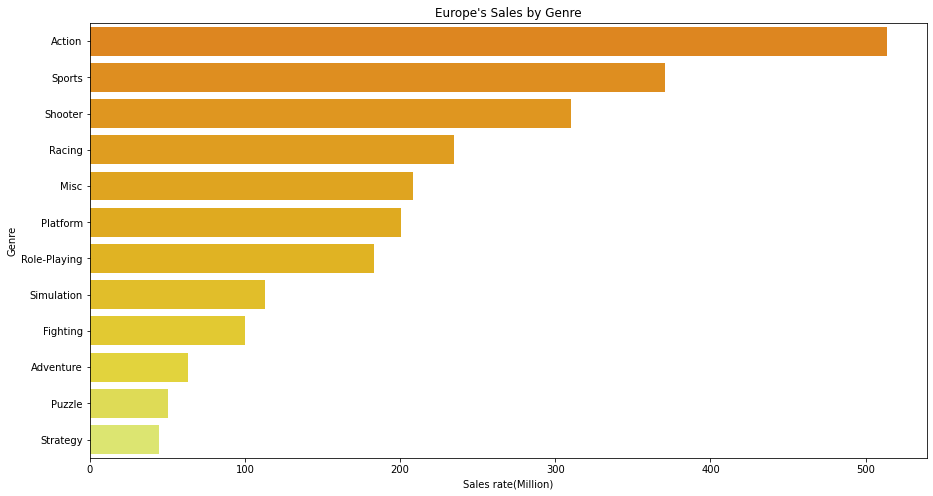

In [ ]:
#유럽 그래프
EU=sales_genre_sum[['Genre','EU_Sales']].sort_values('EU_Sales',ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(x=EU['EU_Sales'],y=EU['Genre'],palette='Wistia_r')
plt.title("Europe's Sales by Genre")
plt.xlabel("Sales rate(Million)")
plt.ylabel("Genre")

plt.savefig('1-2.png', transparent = True)

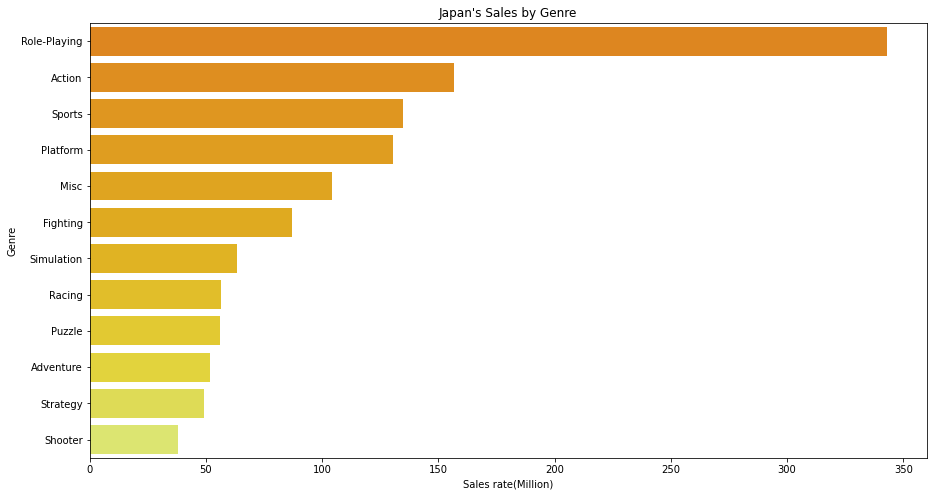

In [ ]:
#일본 그래프
JP=sales_genre_sum[['Genre','JP_Sales']].sort_values('JP_Sales',ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(x=JP['JP_Sales'],y=JP['Genre'],palette='Wistia_r')
plt.title("Japan's Sales by Genre")
plt.xlabel("Sales rate(Million)")
plt.ylabel("Genre")

plt.savefig('1-3.png', transparent = True)

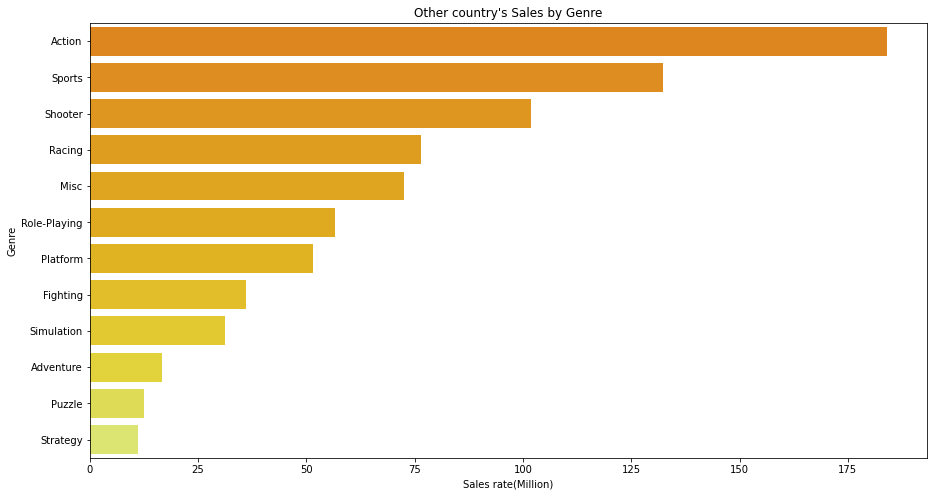

In [ ]:
#이외 국가 그래프
Other=sales_genre_sum[['Genre','Other_Sales']].sort_values('Other_Sales',ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(x=Other['Other_Sales'],y=Other['Genre'],palette='Wistia_r')
plt.title("Other country's Sales by Genre")
plt.xlabel("Sales rate(Million)")
plt.ylabel("Genre")

plt.savefig('1-4.png', transparent = True)

-> 대체로 비슷한 양상을 띠지만, 일본의 경우 다른 지역과 다르게 Role-Playing 장르가 가장 선호되는 것으로 나타난다.

##Topic 2. 연도별 게임의 트렌드가 있을까?

###a) 연도와 플랫폼

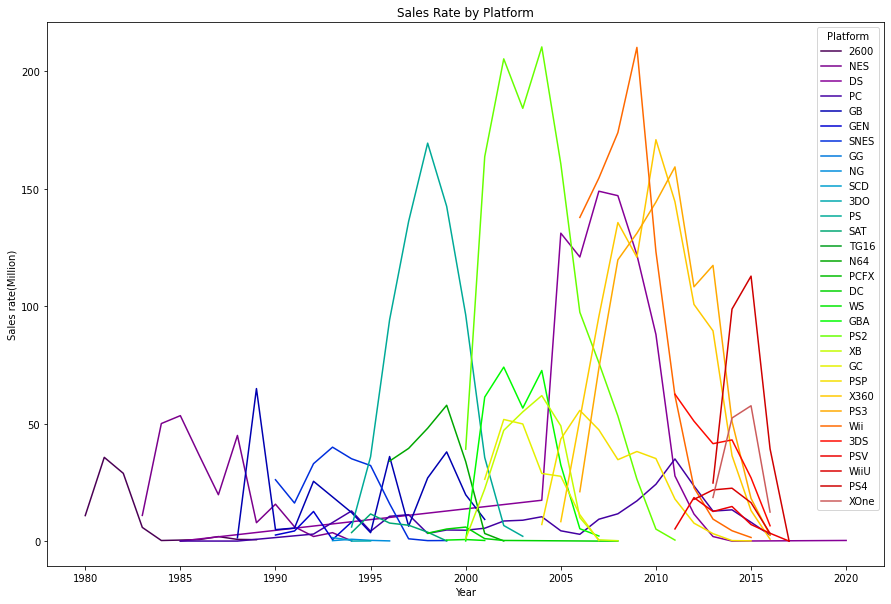

In [ ]:
year_platform=df[['Year','Platform','Total_Sales']] #Year, Platform, Total_Sales 컬럼을 추출한 데이터프레임 생성

year_platform=year_platform.groupby(['Year','Platform']).sum() #Year, Platform으로 그룹화 한 후 Total_Sales 값을 합함.
year_platform=pd.DataFrame(year_platform).reset_index()

plt.figure(figsize=(15,10))
sns.lineplot(x=year_platform['Year'],y=year_platform['Total_Sales'],hue=year_platform['Platform'],palette='nipy_spectral') #전체 년도의 전세계 플랫폼별 출고량 그래프
plt.title("Sales Rate by Platform")
plt.ylabel("Sales rate(Million)")

plt.savefig('2-1.png', transparent = True)

-> 새롭게 출현한 플랫폼에 대한 출고량이 높은 것으로 나타난다. 또한, 전성기가 지나면 그 이후로 다시 오르지 않는 것으로 나타난다.

###=> 새롭게 출시한 플랫폼에 열광하는 트렌드가 나타난다.

###b) 연도와 장르

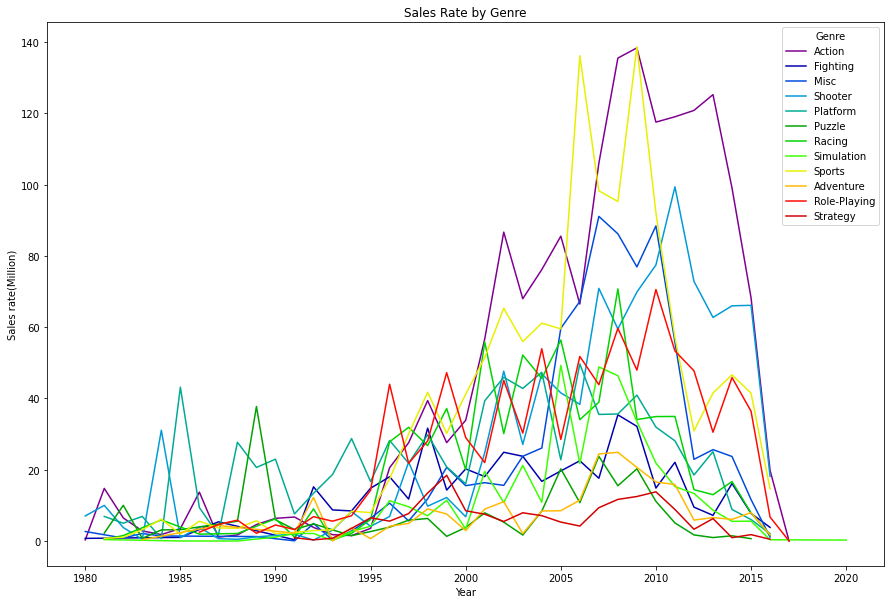

In [ ]:
year_genre=df[['Year','Genre','Total_Sales']] #Year, Genre, Total_Sales 컬럼을 추출한 데이터프레임 생성

year_genre=year_genre.groupby(['Year','Genre']).sum() #Year, Genre로 그룹화 한 후 Total_Sales 값을 합함.
year_genre=pd.DataFrame(year_genre).reset_index()

plt.figure(figsize=(15,10))
sns.lineplot(x=year_genre['Year'],y=year_genre['Total_Sales'],hue=year_genre['Genre'],palette='nipy_spectral') #전체 년도의 전체 나라 장르별 출고량 그래프
plt.title("Sales Rate by Genre")
plt.ylabel("Sales rate(Million)")

plt.savefig('2-2.png', transparent = True)

-> Action은 2000년대부터 꾸준히 최상위권을 유지하는 것으로 나타난다. Shooter는 계속 상승세를 타는 것으로 나타난다. Role-Playing은 전체적으로 게임 소비량이 많아짐에도 출고량이 높아지지 않고 일정수준으로 유지되는 것으로 보아, 매니아층이 존재하는 것으로 보인다.

###=> Action 장르는 항상 인기가 많고, Shooter 장르는 점점 상승세를 타는 트렌드가 나타난다. 또한, Role-Playing 장르는 매니아층이 존재하는 듯 일정수준을 계속 유지한다.

##Topic 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

- 출고량 상위 30개의 게임에 대해서 Publisher, Genre, Platform 컬럼의 비율을 파이차트로 확인해본다.

###a) Publisher

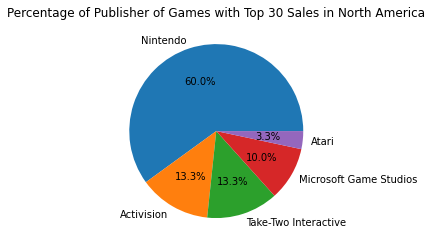

<Figure size 432x288 with 0 Axes>

In [ ]:
na_sales=df.sort_values('NA_Sales',ascending=False) #북아메리카 출고량이 높은 순으로 정렬한 데이터프레임 생성
na_sales=na_sales[:30] #출고량 높은 순으로 30개의 행 추출

na_pub=na_sales[['Name','Publisher']]
na_pub=na_pub.groupby('Publisher').count()
na_pub.rename(columns={'Name':'Count'},inplace=True)
na_pub.sort_values('Count',inplace=True,ascending=False)
na_pub=na_pub.reset_index()

plt.title("Percentage of Publisher of Games with Top 30 Sales in North America") #북아메리카 출고량 상위 30개 게임의 회사 비율 그래프
plt.pie(na_pub['Count'],labels=na_pub['Publisher'],autopct='%.1f%%')
plt.show()

plt.savefig('3-1.png', transparent = True)

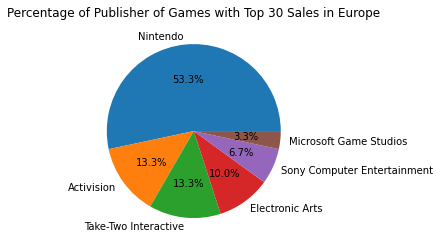

<Figure size 432x288 with 0 Axes>

In [ ]:
eu_sales=df.sort_values('EU_Sales',ascending=False) #유럽 출고량이 높은 순으로 정렬한 데이터프레임 생성
eu_sales=eu_sales[:30] #출고량 높은 순으로 30개의 행 추출

eu_pub=eu_sales[['Name','Publisher']]
eu_pub=eu_pub.groupby('Publisher').count()
eu_pub.rename(columns={'Name':'Count'},inplace=True)
eu_pub.sort_values('Count',inplace=True,ascending=False)
eu_pub=eu_pub.reset_index()

plt.title("Percentage of Publisher of Games with Top 30 Sales in Europe") #유럽 출고량 상위 30개 게임의 회사 비율 그래프
plt.pie(eu_pub['Count'],labels=eu_pub['Publisher'],autopct='%.1f%%')
plt.show()

plt.savefig('3-2.png', transparent = True)

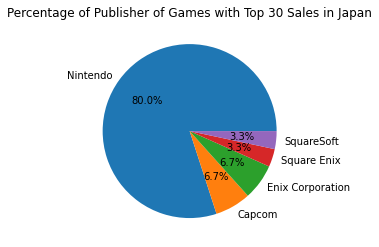

<Figure size 432x288 with 0 Axes>

In [ ]:
jp_sales=df.sort_values('JP_Sales',ascending=False) #일본 출고량이 높은 순으로 정렬한 데이터프레임 생성
jp_sales=jp_sales[:30] #출고량 높은 순으로 30개의 행 추출

jp_pub=jp_sales[['Name','Publisher']]
jp_pub=jp_pub.groupby('Publisher').count()
jp_pub.rename(columns={'Name':'Count'},inplace=True)
jp_pub.sort_values('Count',inplace=True,ascending=False)
jp_pub=jp_pub.reset_index()

plt.title("Percentage of Publisher of Games with Top 30 Sales in Japan") #일본 출고량 상위 30개 게임의 회사 비율 그래프
plt.pie(jp_pub['Count'],labels=jp_pub['Publisher'],autopct='%.1f%%')
plt.show()

plt.savefig('3-3.png', transparent = True)

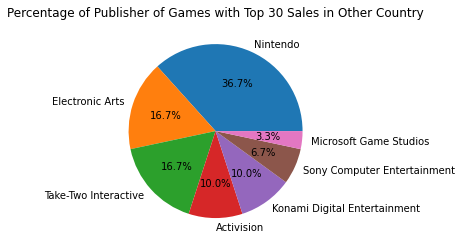

<Figure size 432x288 with 0 Axes>

In [ ]:
other_sales=df.sort_values('Other_Sales',ascending=False) #이외 국가 출고량이 높은 순으로 정렬한 데이터프레임 생성
other_sales=other_sales[:30] #출고량 높은 순으로 30개의 행 추출

other_pub=other_sales[['Name','Publisher']]
other_pub=other_pub.groupby('Publisher').count()
other_pub.rename(columns={'Name':'Count'},inplace=True)
other_pub.sort_values('Count',inplace=True,ascending=False)
other_pub=other_pub.reset_index()

plt.title("Percentage of Publisher of Games with Top 30 Sales in Other Country") #이외 국가 출고량 상위 30개 게임의 회사 비율 그래프
plt.pie(other_pub['Count'],labels=other_pub['Publisher'],autopct='%.1f%%')
plt.show()

plt.savefig('3-4.png', transparent = True)

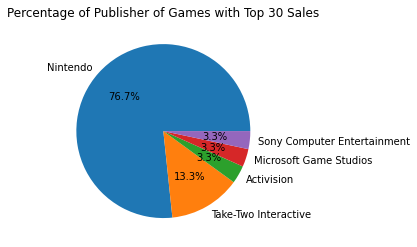

<Figure size 432x288 with 0 Axes>

In [ ]:
total_sales=df.sort_values('Total_Sales',ascending=False) #전세계 출고량이 높은 순으로 정렬한 데이터프레임 생성
total_sales=total_sales[:30] #출고량 높은 순으로 30개의 행 추출

total_pub=total_sales[['Name','Publisher']]
total_pub=total_pub.groupby('Publisher').count()
total_pub.rename(columns={'Name':'Count'},inplace=True)
total_pub.sort_values('Count',inplace=True,ascending=False)
total_pub=total_pub.reset_index()

plt.title("Percentage of Publisher of Games with Top 30 Sales") #출고량 상위 30개 게임의 회사 비율 그래프
plt.pie(total_pub['Count'],labels=total_pub['Publisher'],autopct='%.1f%%')
plt.show()

plt.savefig('3-5.png', transparent = True)

-> 지역을 불문하고 게임회사 Nintendo의 지분이 가장 높은 것으로 나타났다.

###b) Genre

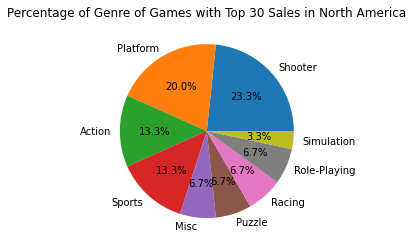

<Figure size 432x288 with 0 Axes>

In [ ]:
na_genre=na_sales[['Name','Genre']]
na_genre=na_genre.groupby('Genre').count()
na_genre.rename(columns={'Name':'Count'},inplace=True)
na_genre.sort_values('Count',inplace=True,ascending=False)
na_genre=na_genre.reset_index()

plt.title("Percentage of Genre of Games with Top 30 Sales in North America") #북아메리카 출고량 상위 30개 게임의 장르 비율 그래프
plt.pie(na_genre['Count'],labels=na_genre['Genre'],autopct='%.1f%%')
plt.show()

plt.savefig('3-6.png', transparent = True)

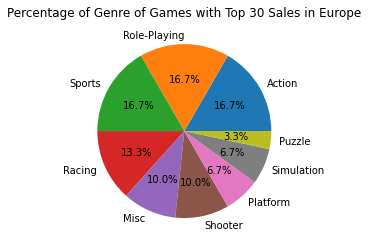

<Figure size 432x288 with 0 Axes>

In [ ]:
eu_genre=eu_sales[['Name','Genre']]
eu_genre=eu_genre.groupby('Genre').count()
eu_genre.rename(columns={'Name':'Count'},inplace=True)
eu_genre.sort_values('Count',inplace=True,ascending=False)
eu_genre=eu_genre.reset_index()

plt.title("Percentage of Genre of Games with Top 30 Sales in Europe") #유럽 출고량 상위 30개 게임의 장르 비율 그래프
plt.pie(eu_genre['Count'],labels=eu_genre['Genre'],autopct='%.1f%%')
plt.show()

plt.savefig('3-7.png', transparent = True)

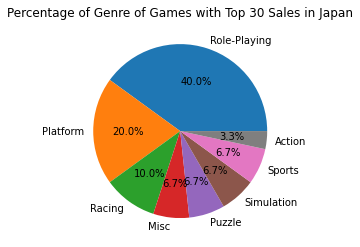

<Figure size 432x288 with 0 Axes>

In [ ]:
jp_genre=jp_sales[['Name','Genre']]
jp_genre=jp_genre.groupby('Genre').count()
jp_genre.rename(columns={'Name':'Count'},inplace=True)
jp_genre.sort_values('Count',inplace=True,ascending=False)
jp_genre=jp_genre.reset_index()

plt.title("Percentage of Genre of Games with Top 30 Sales in Japan") #일본 출고량 상위 30개 게임의 장르 비율 그래프
plt.pie(jp_genre['Count'],labels=jp_genre['Genre'],autopct='%.1f%%')
plt.show()

plt.savefig('3-8.png', transparent = True)

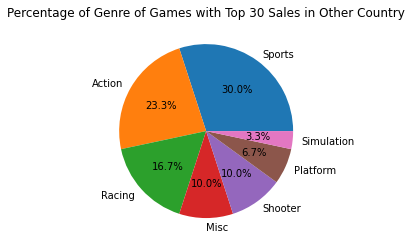

<Figure size 432x288 with 0 Axes>

In [ ]:
other_genre=other_sales[['Name','Genre']]
other_genre=other_genre.groupby('Genre').count()
other_genre.rename(columns={'Name':'Count'},inplace=True)
other_genre.sort_values('Count',inplace=True,ascending=False)
other_genre=other_genre.reset_index()

plt.title("Percentage of Genre of Games with Top 30 Sales in Other Country") #이외 국가 출고량 상위 30개 게임의 장르 비율 그래프
plt.pie(other_genre['Count'],labels=other_genre['Genre'],autopct='%.1f%%')
plt.show()

plt.savefig('3-9.png', transparent = True)

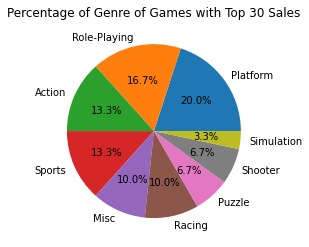

<Figure size 432x288 with 0 Axes>

In [ ]:
total_genre=total_sales[['Name','Genre']]
total_genre=total_genre.groupby('Genre').count()
total_genre.rename(columns={'Name':'Count'},inplace=True)
total_genre.sort_values('Count',inplace=True,ascending=False)
total_genre=total_genre.reset_index()

plt.title("Percentage of Genre of Games with Top 30 Sales") #출고량 상위 30개 게임의 장르 비율 그래프
plt.pie(total_genre['Count'],labels=total_genre['Genre'],autopct='%.1f%%')
plt.show()

plt.savefig('3-10.png', transparent = True)

-> 시장 규모가 가장 큰 지역인 북아메리카에서 가장 높은 지분을 가지는 Shooter 장르가 전세계로 봤을 때에는 6.7%에 불과하다. 전세계적으로는 Platform 장르가 출고량 상위권에 가장 많이 분포한다.

###c) Platform

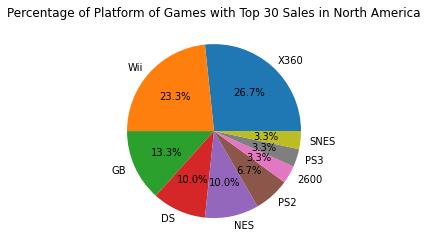

<Figure size 432x288 with 0 Axes>

In [ ]:
na_plat=na_sales[['Name','Platform']]
na_plat=na_plat.groupby('Platform').count()
na_plat.rename(columns={'Name':'Count'},inplace=True)
na_plat.sort_values('Count',inplace=True,ascending=False)
na_plat=na_plat.reset_index()

plt.title("Percentage of Platform of Games with Top 30 Sales in North America") #북아메리카 출고량 상위 30개 게임의 플랫폼 비율 그래프
plt.pie(na_plat['Count'],labels=na_plat['Platform'],autopct='%.1f%%')
plt.show()

plt.savefig('3-11.png', transparent = True)

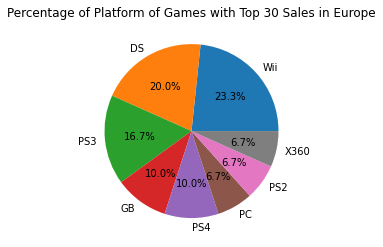

<Figure size 432x288 with 0 Axes>

In [ ]:
eu_plat=eu_sales[['Name','Platform']]
eu_plat=eu_plat.groupby('Platform').count()
eu_plat.rename(columns={'Name':'Count'},inplace=True)
eu_plat.sort_values('Count',inplace=True,ascending=False)
eu_plat=eu_plat.reset_index()

plt.title("Percentage of Platform of Games with Top 30 Sales in Europe") #유럽 출고량 상위 30개 게임의 플랫폼 비율 그래프
plt.pie(eu_plat['Count'],labels=eu_plat['Platform'],autopct='%.1f%%')
plt.show()

plt.savefig('3-12.png', transparent = True)

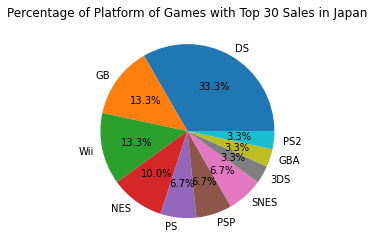

<Figure size 432x288 with 0 Axes>

In [ ]:
jp_plat=jp_sales[['Name','Platform']]
jp_plat=jp_plat.groupby('Platform').count()
jp_plat.rename(columns={'Name':'Count'},inplace=True)
jp_plat.sort_values('Count',inplace=True,ascending=False)
jp_plat=jp_plat.reset_index()

plt.title("Percentage of Platform of Games with Top 30 Sales in Japan") #일본 출고량 상위 30개 게임의 플랫폼 비율 그래프
plt.pie(jp_plat['Count'],labels=jp_plat['Platform'],autopct='%.1f%%')
plt.show()

plt.savefig('3-13.png', transparent = True)

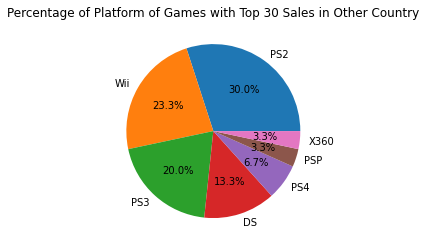

<Figure size 432x288 with 0 Axes>

In [ ]:
other_plat=other_sales[['Name','Platform']]
other_plat=other_plat.groupby('Platform').count()
other_plat.rename(columns={'Name':'Count'},inplace=True)
other_plat.sort_values('Count',inplace=True,ascending=False)
other_plat=other_plat.reset_index()

plt.title("Percentage of Platform of Games with Top 30 Sales in Other Country") #이외 국가 출고량 상위 30개 게임의 플랫폼 비율 그래프
plt.pie(other_plat['Count'],labels=other_plat['Platform'],autopct='%.1f%%')
plt.show()

plt.savefig('3-14.png', transparent = True)

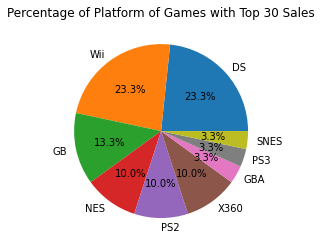

<Figure size 432x288 with 0 Axes>

In [ ]:
total_plat=total_sales[['Name','Platform']]
total_plat=total_plat.groupby('Platform').count()
total_plat.rename(columns={'Name':'Count'},inplace=True)
total_plat.sort_values('Count',inplace=True,ascending=False)
total_plat=total_plat.reset_index()

plt.title("Percentage of Platform of Games with Top 30 Sales") #출고량 상위 30개 게임의 플랫폼 비율 그래프
plt.pie(total_plat['Count'],labels=total_plat['Platform'],autopct='%.1f%%')
plt.show()

plt.savefig('3-15.png', transparent = True)

-> 시장 규모가 가장 큰 지역인 북아메리카에서 가장 높은 지분을 가지는 X360이 전세계로 봤을 때에는 10%에 불과하다. 전세계적으로는 DS, Wii가 출고량 상위권에 가장 많이 분포한다.

###=> 시장 규모가 가장 큰 북아메리카가 의외로 전세계적 양상과는 조금 다른 경우가 많았음.(Genre, Platform) 그러나 Publisher의 경우, 각 지역별로 통계을 냈을 때나 전세계적으로 통계를 냈을 때나 동일하게 Nintendo가 출고량 상위권에 가장 많이 자리하고 있음.

##Topic 4. 닌텐도 플랫폼 게임과 플레이스테이션 플랫폼 게임은 각각 어떤 장르가 인기가 많을까?

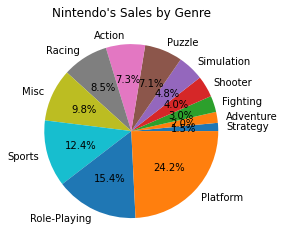

<Figure size 432x288 with 0 Axes>

In [ ]:
nintendo=df[df['Publisher']=='Nintendo']['Platform'].unique() #닌텐도의 플랫폼들

nintendo_genre=df[df['Publisher']=='Nintendo']
nintendo_genre=nintendo_genre[['Genre','Total_Sales']]
nintendo_genre=nintendo_genre.groupby('Genre').sum()
nintendo_genre=nintendo_genre.sort_values('Total_Sales')
nintendo_genre=nintendo_genre.reset_index()

plt.title("Nintendo's Sales by Genre")
plt.pie(nintendo_genre['Total_Sales'],labels=nintendo_genre['Genre'],autopct='%.1f%%')
plt.show()

plt.savefig('4-1.png', transparent = True)

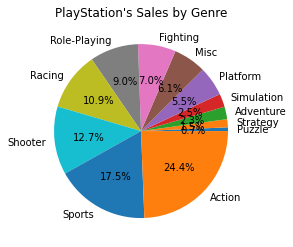

<Figure size 432x288 with 0 Axes>

In [ ]:
playstation=['PS','PS2','PS3','PS4','PSP'] #플레이스테이션의 플랫폼들

playstation_genre=df[(df['Platform']=='PS')|(df['Platform']=='PS2')|(df['Platform']=='PS3')|(df['Platform']=='PS4')|(df['Platform']=='PSP')]
playstation_genre=playstation_genre[['Genre','Total_Sales']]
playstation_genre=playstation_genre.groupby('Genre').sum()
playstation_genre=playstation_genre.sort_values('Total_Sales')
playstation_genre=playstation_genre.reset_index()

plt.title("PlayStation's Sales by Genre")
plt.pie(playstation_genre['Total_Sales'],labels=playstation_genre['Genre'],autopct='%.1f%%')
plt.show()

plt.savefig('4-2.png', transparent = True)

-> 닌텐도의 플랫폼들은 Platform, Role-Playing, Sports 순으로 인기가 많고, 플레이스테이션의 플랫폼들은 Action, Sports, Shooter 순으로 인기가 많다.

##결론 및 출고량 예측

지역에 따라 선호하는 장르가 다르며, 새로운 플랫폼에 대한 관심도가 높다. 또한, Action 장르는 항상 인기가 많다. 특히 Action 장르는 playstation 플랫폼에서 가장 선호된다.


> 결론: Playstation의 가장 최근에 출시된 플랫폼에서 Action 장르의 게임을 출시한다.



###출고량 예측 (다음 분기가 2015년 상반기라고 가정)

In [ ]:
def gradient_descent(X, y, lr = 0.05, epoch = 10):
    
    a, b = 0.33, 0.48 # 임의 선택한 파라미터 a, b
    N = len(X) # 샘플 갯수
    
    for _ in range(epoch):            
        f = y - (a*X + b)
    
        # a와 b를 업데이트 합니다
        a -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)        
        
    return a,b

result=df[(df['Platform']=='PS4')&(df['Genre']=='Action')] #가장 최근의 PlayStation 플랫폼인 PS4, 장르는 Action인 데이터 추출
result=result[['Year','Total_Sales']]
result=result[result['Year']<2015] #다음 분기를 2015년으로 가정하였으므로 그 이전의 데이터만 추출

Year=result['Year']-result['Year'].min() #경사하강법의 X
Total_Sales=result['Total_Sales']*100 #경사하강법의 y

a,b=gradient_descent(Year,Total_Sales,epoch=1000)

(a*(2015-result['Year'].min())+b)/100 #예상되는 출고량

0.6863629229700575

-> 약 68만의 출고량을 기록할 것으로 예상됨.